In [3]:
import matplotlib.pyplot as plt
import math

We import our datas.

In [4]:
list4th = []
with open('./4thpacket.txt') as f :
    for line in f:
        list4th.append(int(line.strip()))
        
listDomain = []
with open('./domain-length.txt') as f :
    for line in f:
        listDomain.append(int(line.strip()))

We plot our histograms.

Text(0, 0.5, 'Frequency')

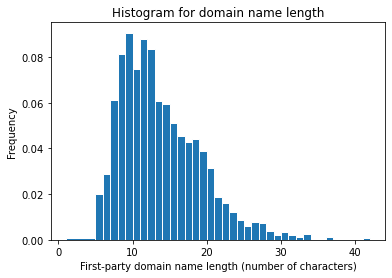

In [5]:
bins=[1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,41,42]
plt.hist(listDomain, bins=bins, edgecolor='white', density = True)
plt.title('Histogram for domain name length')
plt.xlabel('First-party domain name length (number of characters)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

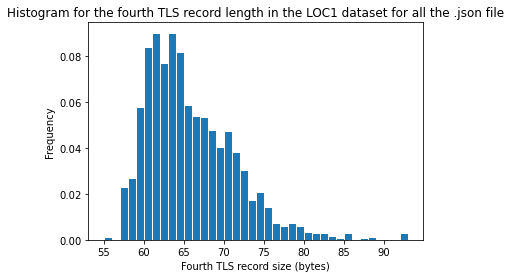

In [6]:
binsb=[55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93]
plt.hist(list4th, bins=binsb, edgecolor='white', density = True)
plt.title('Histogram for the fourth TLS record length in the LOC1 dataset for all the .json file')
plt.xlabel('Fourth TLS record size (bytes)')
plt.ylabel('Frequency')

# Comparisons
We will now shift the datas of the domain length histogram by 51 bytes so that we will be able to :
- supperpose it to the other histogram to compare them
- plot the histogram of the difference between the two

Then we will compute the entropy of the domain name length and of the 4th TLS record size and compare them

### Superposition and difference

In [7]:
listDomain51=[0]*len(listDomain)
for i in range(len(listDomain)):
    listDomain51[i]=listDomain[i]+51

I chose to change the opacity of the histograms so that we will be able to see the superposition and the differences at the same time.

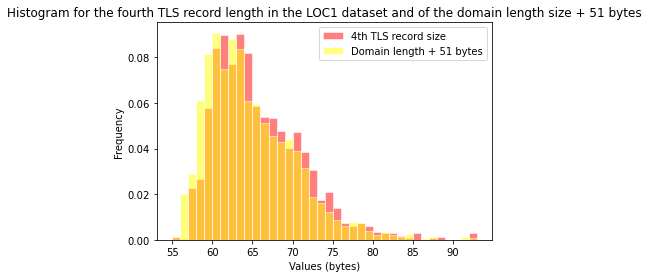

In [8]:
plt.hist(list4th, bins=binsb, edgecolor='white', density = True, label='4th TLS record size', color='red', alpha=0.5)
plt.hist(listDomain51, bins=binsb, edgecolor='white', density = True, label='Domain length + 51 bytes', color='yellow', alpha=0.5)
plt.title('Histogram for the fourth TLS record length in the LOC1 dataset and of the domain length size + 51 bytes')
plt.xlabel('Values (bytes)')
plt.ylabel('Frequency')
plt.legend()

It looks like it should be shifted but one more byte to supperpose nicely. Let's try it out.

In [9]:
listDomain52=[0]*len(listDomain)
for i in range(len(listDomain)):
    listDomain52[i]=listDomain[i]+52

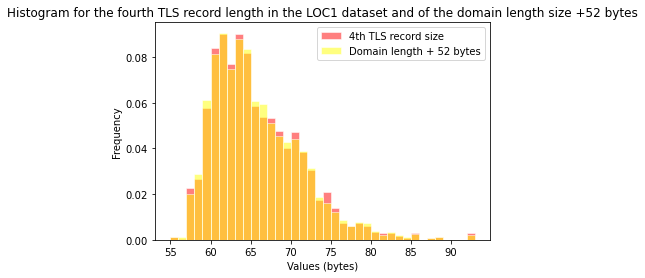

In [10]:
plt.hist(list4th, bins=binsb, edgecolor='white', density = True, label='4th TLS record size', color='red', alpha=0.5)
plt.hist(listDomain52, bins=binsb, edgecolor='white', density = True, label='Domain length + 52 bytes', color='yellow', alpha=0.5)
plt.title('Histogram for the fourth TLS record length in the LOC1 dataset and of the domain length size +52 bytes')
plt.xlabel('Values (bytes)')
plt.ylabel('Frequency')
plt.legend()

We can now see how it perfectly supperpose with the other histogram. This is interesting because on the paper they said that it had to be shifted by 51 bytes (which is the length of the https header), but to superpose the right way it has be shifted by 52 bytes. 

##### Entropy
#### Domain length entropy
entropie = somme pour chaque i de (fq(i) * log2(fq(i)))

In [59]:
freqDom=[]
#to get the frequency   
def freq(list):
    dict , count = {} , 0
    for c in list:
        if c not in dict:
            dict[c] = 1
            count += 1
        else:
            dict[c] += 1
            count += 1
            
    return dict , count

dom, count = freq(listDomain)

#I create couples of values instead of a dict (value, apparition)
L = sorted(dom.items(), key = lambda column: column[1] , reverse = True)
       
for val in(dom.values()):
    freqDom.append(val/count)

In [60]:
hdom = 0.0
for i in range(len(freqDom)) :
    hdom = hdom + freqDom[i] + math.log(freqDom[i], 2.0)
hdom

-225.23512839766673

#### Domain length entropy


In [61]:
freq4th=[]
fourth, count2 = freq(list4th)

#I create couples of values instead of a dict (value, apparition)
L = sorted(fourth.items(), key = lambda column: column[1] , reverse = True)
       
for val in(fourth.values()):
    freq4th.append(val/count2)

In [62]:
hfourth = 0.0
for i in range(len(freq4th)) :
    hfourth = hfourth + freq4th[i] + math.log(freq4th[i], 2.0)
hfourth

-253.93717272841909